In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 5.5
fig_height = 3.5
fig_format = :pdf
fig_dpi = 300

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/docencia/analisis-practicas-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


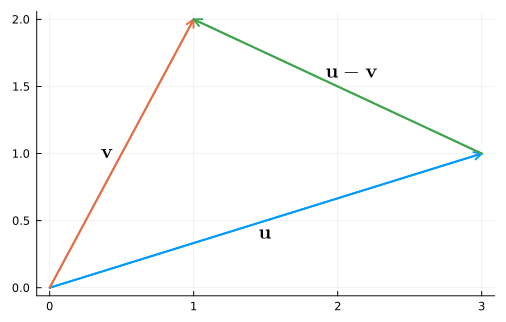

In [2]:
using Plots
using LaTeXStrings
Plots.plot([0, 3], [0, 1], arrow = true, linewidth = 2, legend = false)
annotate!(1.5, 0.4, L"$\mathbf{u}$")
Plots.plot!([0, 1], [0, 2], arrow = true, linewidth = 2)
annotate!(0.4, 1, L"$\mathbf{v}$")
Plots.plot!([3, 1], [1, 2], arrow = true, linewidth = 2)
annotate!(2.1, 1.6, L"$\mathbf{u}-\mathbf{v}$")

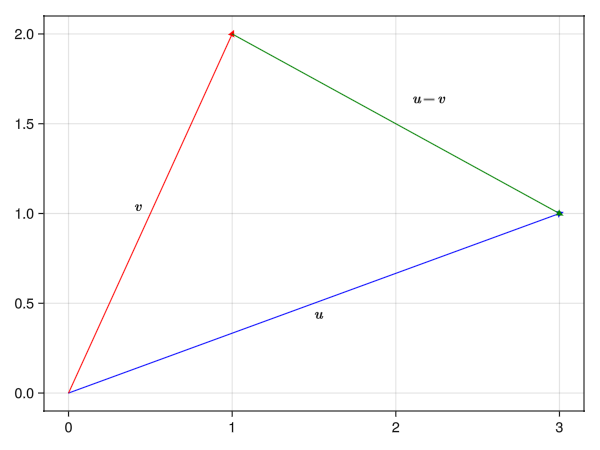

In [3]:
using GLMakie
using LaTeXStrings
o = Point2(0, 0)
u = Vec2(3, 1)
v = Vec2(1, 2)
fig = Figure()
ax = Axis(fig[1,1])
arrows!(ax, [o], [u], color = :blue)
text!(ax, 1.5, 0.4, text = L"$\mathbf{u}$")
arrows!(ax, [o], [v], color = :red)
text!(ax, 0.4, 1, text = L"$\mathbf{v}$")
arrows!(ax, [o+v], [u-v], color = :green)
text!(ax, 2.1, 1.6, text = L"$\mathbf{u}-\mathbf{v}$")
fig

In [4]:
using LinearAlgebra
u = [-1, 2, -1]
v = [-2, 0, 1]
println("Módulo de u: $(norm(u))")
println("Módulo de v: $(norm(v))")
println("Vector unitario con la dirección de u $(u/norm(u))")
println("Vector unitario con la dirección de v $(v/norm(v))")

Módulo de u: 2.449489742783178


Módulo de v: 2.23606797749979
Vector unitario con la dirección de u [-0.4082482904638631, 0.8164965809277261, -0.4082482904638631]
Vector unitario con la dirección de v [-0.8944271909999159, 0.0, 0.4472135954999579]


In [5]:
println("Producto escalar de u y v: $(dot(u, v))")
# También se puede usar el clásico punto ⋅
println("Producto escalar de u y v: $(u ⋅ v)")

Producto escalar de u y v: 1
Producto escalar de u y v: 1


In [6]:
println("Producto vectorial de u y v: $(cross(u, v))")
# También se puede usar la clásica cruz × 
println("Producto vectorial de u y v: $(u × v)")

Producto vectorial de u y v: [2, 3, 4]


Producto vectorial de u y v: [2, 3, 4]


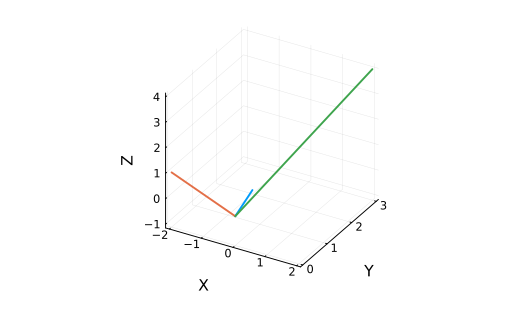

In [7]:
using Plots
uv = u × v
Plots.plot([0, u[1]], [0, u[2]], [0, u[3]], arrow = true, linewidth = 2, xlabel = "X", ylabel = "Y", zlabel = "Z", legend = false)
Plots.plot!([0, v[1]], [0, v[2]], [0, v[3]], arrow = true, linewidth = 2)
Plots.plot!([0, uv[1]], [0, uv[2]], [0, uv[3]], arrow = true, linewidth = 2)

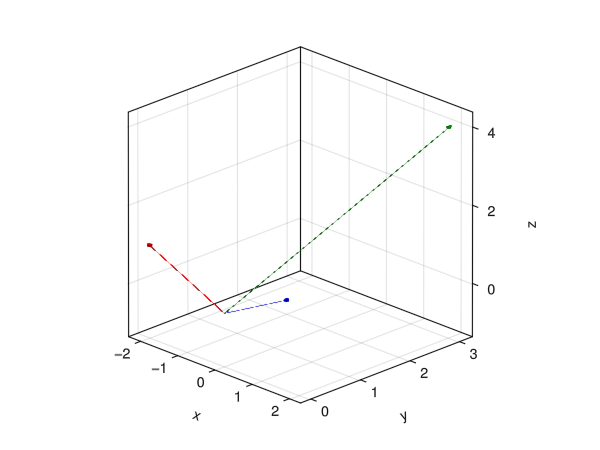

In [8]:
using GLMakie
fig = Figure()
ax = Axis3(fig[1,1], azimuth = -pi/4, aspect = (1,1,1))
O = [0, 0 ,0]
arrows!(ax, [Point3(O)], [Vec3(u), Vec3(v), Vec3(u × v)], 
    linecolor = [:blue,:red, :green], arrowcolor = [:blue,:red, :green],
    linewidth = 0.02, arrowsize = Vec3(0.1, 0.1, 0.1))
fig

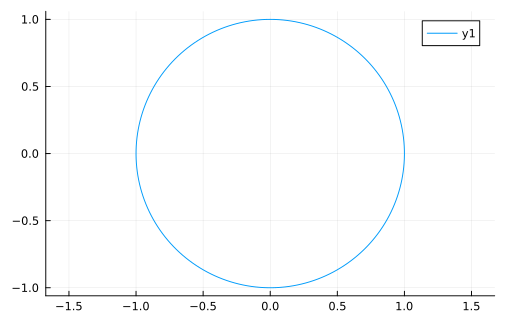

In [9]:
using Plots
f(t) = [sin(t), cos(t)] 
ts = range(0, 2pi, length = 200)
xs = [f(t)[1] for t in ts]
ys = [f(t)[2] for t in ts]
Plots.plot(xs, ys, aspect_ratio = :equal)

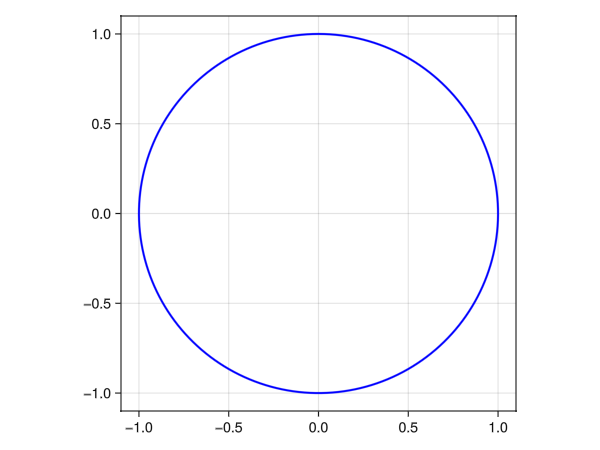

In [10]:
using GLMakie
f(t) = [sin(t), cos(t)] 
ts = range(0, 2pi, length = 200)
points = Point2.(f.(ts))
fig = Figure()
ax = Axis(fig[1,1], aspect = 1)
lines!(ax, points, linewidth = 2, color = :blue)
fig

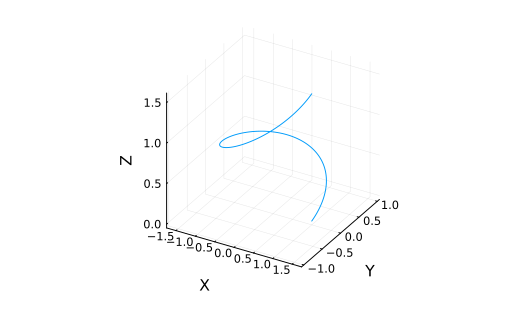

In [11]:
g(t) = [cos(t), sin(t), t/4] 
ts = range(0, 2pi, length = 200)
xs = [g(t)[1] for t in ts]
ys = [g(t)[2] for t in ts]
zs = [g(t)[3] for t in ts]
Plots.plot(xs, ys, zs, aspect_ratio = :equal, xlabel = "X", ylabel = "Y", zlabel = "Z", label = "")

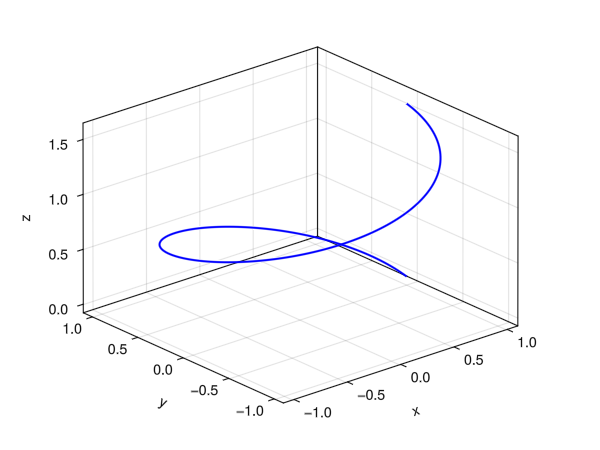

In [12]:
using GLMakie
g(t) = [cos(t), sin(t), t/4] 
ts = range(0, 2pi, length = 200)
points = Point3.(g.(ts))
fig = Figure()
ax = Axis3(fig[1,1])
lines!(ax, points, linewidth = 2, color = :blue)
fig

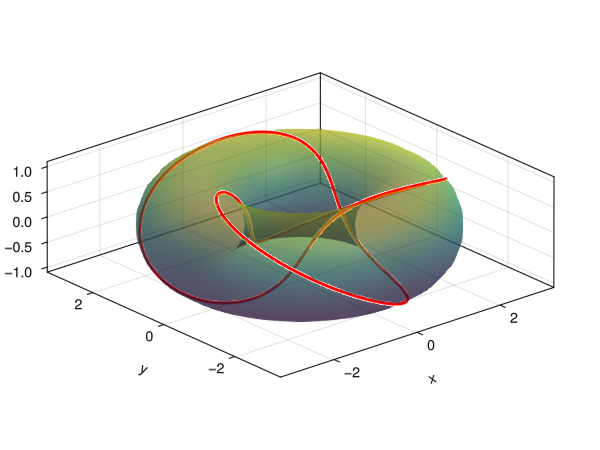

In [13]:
using GLMakie
# Definimos las ecuaciones paramétricas del toro.
U = range(-pi, pi, 100)
V = range(-pi, pi, 20)
x1 = [2cos(u) + cos(u) * cos(v) for u in U, v in V]
y1 = [2sin(u) + sin(u) * cos(v) for u in U, v in V]
z1 = [sin(v) for u in U, v in V]
# Inicializamos la figura y los ejes.
fig = Figure()
ax = Axis3(fig[1,1], aspect = (3, 3, 1))
# Dibujamos el toro.
Makie.surface!(ax, x1, y1, z1; colormap = :viridis, transparency = true, alpha = 0.5)
# Definimos la función vectorial de nudo tórico.
f(t) = [(2+cos(3t))cos(2t), (2+cos(3t))sin(2t), -sin(3t)] 
# Generamos los puntos de la trayectoria del nudo tórico.
ts = range(0, 2pi, length = 200)
points = Point3.(f.(ts))
# Dibujamos el nudo tórico.
lines!(ax, points, linewidth = 3, color = :red)
fig

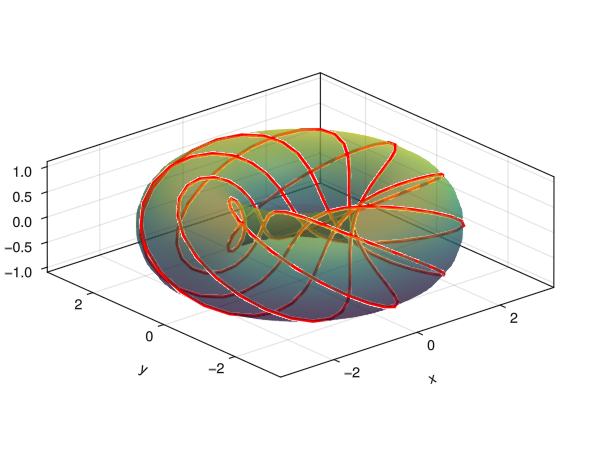

In [14]:
using GLMakie
"""
    nudo_torico(ax, p, q, toro)

Función dibuja un nudo tórico de parámetros p, q sobre los ejes ax. Si el parámetro toro es true dibuja también el toro sobre el que se traza el nudo.
"""
function nudo_torico(ax::Axis3, p::Int64, q::Int64, toro::Bool = true)
    if toro 
        alpha = 0.5
    else
        alpha = 0
    end
    # Definimos las ecuaciones paramétricas del toro.
    U = range(-pi, pi, 100)
    V = range(-pi, pi, 20)
    x1 = [2cos(u) + cos(u) * cos(v) for u in U, v in V]
    y1 = [2sin(u) + sin(u) * cos(v) for u in U, v in V]
    z1 = [sin(v) for u in U, v in V]
    # Dibujamos el toro en los ejes.
    Makie.surface!(ax, x1, y1, z1; colormap = :viridis, transparency = true, alpha = alpha)
    # Definimos la función vectorial de nudo tórico.
    f(t) = [(2+cos(q*t))cos(p*t), (2+cos(q*t))sin(p*t), -sin(q*t)] 
    # Generamos los puntos de la trayectoria del nudo tórico.
    ts = range(0, 2pi, length = 200)
    points = Point3.(f.(ts))
    # Dibujamos el nudo tórico.
    lines!(ax, points, linewidth = 3, color = :red)
end

fig = Figure()
ax = Axis3(fig[1,1], aspect = (3, 3, 1))
nudo_torico(ax, 5, 9, true)
fig

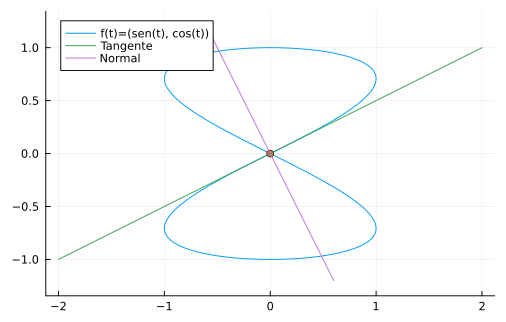

In [15]:
using SymPy, Plots
@syms t::real
# Definimos la función vectorial.
f(t) = [sin(2t), cos(t)]
# Instante 
a = pi/2
# Dibujamos la trayectoria.
Plots.plot(f(t)..., 0, 2pi, aspect_ratio = :equal, label = "f(t)=(sen(t), cos(t))")
# Dibujamos el punto de tangencia.
Plots.scatter!([f(a)[1]],[f(a)[2]], label = "")
# Calculamos la función derivada.
df = lambdify(diff.(f(t)))
# Calculamos la ecuación de la recta tangente.
tl(t) = f(a) + df(a) * t
# Dibujamos la recta tangente.
Plots.plot!(tl(t)..., -1, 1, label = "Tangente")
# Calculamos la ecuación de la recta normal.
nl(t) = f(a) - [df(a)[2],-df(a)[1]] * t
Plots.plot!(nl(t)..., -0.6, 0.6, label = "Normal")

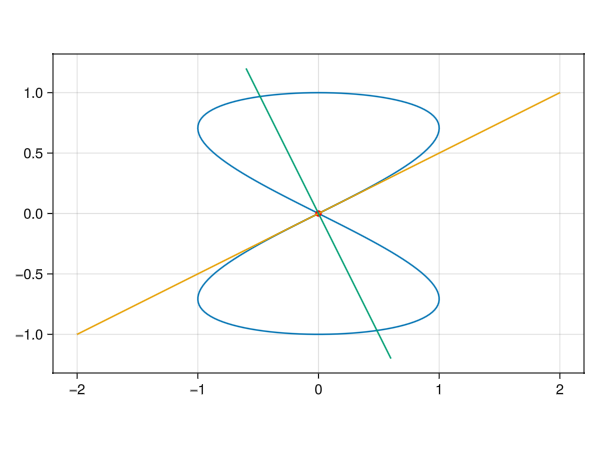

In [16]:
using SymPy, GLMakie
@syms t::real
# Definimos la función vectorial.
f(t) = [sin(2t), cos(t)]
# Instante
a = pi/2
# Dibujamos la trayectoria.
ts = range(0, 2pi, 200)
points = Point2.(f.(ts))
fig = Figure()
ax = Axis(fig[1,1], aspect = DataAspect())
lines!(ax, points)
# Dibujamos el punto de tangencia.
Makie.scatter!(Point2(f(a)), color = :red)
# Calculamos la función derivada.
df = lambdify(diff.(f(t)))
# Calculamos la ecuación de la recta tangente.
tl(t) = f(a) + df(a) * t
# Dibujamos la recta tangente.
pointstl = Point2.(tl.(range(-1, 1, 2)))
lines!(ax, pointstl)    
# Calculamos la ecuación de la recta normal
nl(t) = f(a) - [df(a)[2],-df(a)[1]] * t
pointsnl = Point2.(nl.(range(-0.6, 0.6, 2)))
lines!(ax, pointsnl)
fig

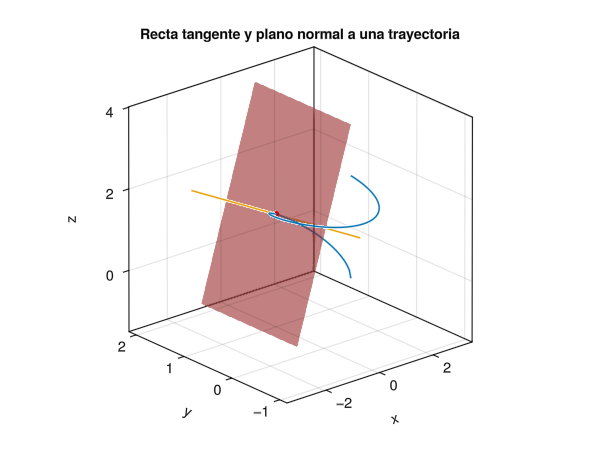

In [17]:
using SymPy, LinearAlgebra, GLMakie
@syms x, y, z, t
# Definimos la función vectorial.
g(t) = [cos(t), sin(t), sqrt(t)]
# Instante 
a = pi/2
# Dibujamos la trayectoria.
ts = range(0, 2pi, 200)
points = Point3.(g.(ts))
fig = Figure()
ax = Axis3(fig[1,1], title = "Recta tangente y plano normal a una trayectoria", aspect = :equal)
lines!(ax, points)
# Dibujamos el punto de tangencia.
Makie.scatter!(Point3(g(a)), color = :red)
# Calculamos la derivada en el punto.
dg = lambdify(diff.(g(t)))
# Calculamos la ecuación de la recta tangente.
tl(t) = g(a) + dg(a) * t
# Dibujamos la recta tangente.
pointstl = Point3.(tl.(range(-pi, pi, 2)))
lines!(ax, pointstl)
# Calculamos la ecuación del plano normal
np = lambdify(solve(dot(([x, y, z] - g(a)), dg(a)), z)[1])
xs = range(-1, 1, 2)
ys = range(0, 2, 2)
zs = [np(x,y) for x in xs, y in ys]
Makie.surface!(ax, xs, ys, zs, colormap = ["red"], alpha = 0.5, transparency = true)
fig

┌ Warning: `shading = false` is not valid. Use `Makie.automatic`, `NoShading`, `FastShading` or `MultiLightShading`. Defaulting to `NoShading`.
└ @ Makie ~/.julia/packages/Makie/YkotL/src/lighting.jl:243


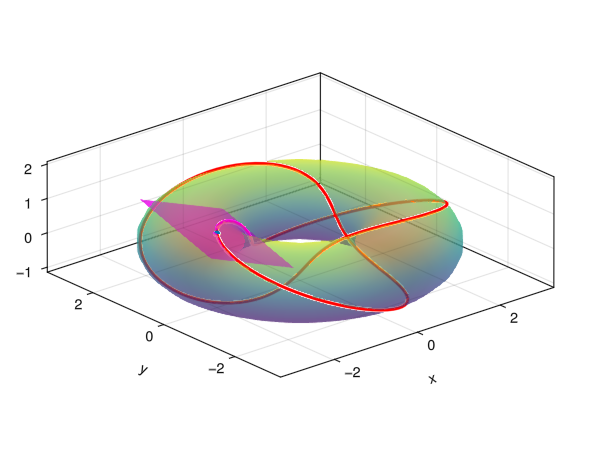

In [18]:
using SymPy, LinearAlgebra, GLMakie
@syms x, y, z, t::real
# Definimos las ecuaciones paramétricas del toro.
U = range(-pi, pi, 100)
V = range(-pi, pi, 20)
x1 = [2cos(u) + cos(u) * cos(v) for u in U, v in V]
y1 = [2sin(u) + sin(u) * cos(v) for u in U, v in V]
z1 = [sin(v) for u in U, v in V]
# Inicializamos la figura y los ejes.
fig = Figure()
ax = Axis3(fig[1,1], aspect = (3, 3, 1))
# Dibujamos el toro.
Makie.surface!(ax, x1, y1, z1; colormap = :viridis, shading = false, transparency = true, alpha = 0.5)
# Definimos la función vectorial de nudo tórico.
f(t) = [(2+cos(3t))cos(2t), (2+cos(3t))sin(2t), -sin(3t)] 
# Generamos los puntos de la trayectoria del nudo tórico.
ts = range(0, 2pi, length = 200)
points = Point3.(f.(ts))
# Dibujamos el nudo tórico.
lines!(ax, points, linewidth = 3, color = :red)
# Punto
a = pi/2
# Dibujamos el punto.
Makie.scatter!(ax, Point3(f(a)))
# Vector tangente unitario.
Tan = lambdify(diff.(f(t)) / norm(diff.(f(t))))
# Vector normal unitario.
Norm = lambdify(diff.(Tan(t)) / norm(diff.(Tan(t))))
# Calculamos la ecuación del plano osculador.
po = lambdify(solve(dot(([x, y, z] - f(a)), cross(Tan(a), Norm(a))), z)[1])
xs = range(-3, -1, 2)
ys = range(-1, 1, 2)
zs = [po(x,y) for x in xs, y in ys]
Makie.surface!(ax, xs, ys, zs, colormap = ["magenta"], alpha = 0.8, transparency = true)
fig

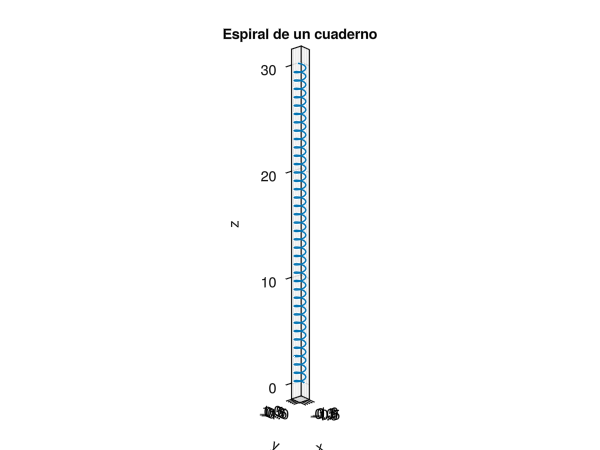

In [19]:
using SymPy, GLMakie
@syms t::real
# Definimos la función vectorial.
f(t) = [cos(t), sin(t), t/8]
# Calculamos el número de revoluciones.
h = N(solve(f(t)[3]-30)[1])
# Dibujamos la trayectoria.
ts = range(0, h, 2000)
points = Point3.(f.(ts))
fig = Figure()
ax = Axis3(fig[1,1], title = "Espiral de un cuaderno", aspect = (1, 1, 30))
lines!(ax, points)
fig

In [20]:
using LinearAlgebra
# Calculamos longitud de la trayectoria
N(integrate(norm(diff.(f(t))), (t, 0, h)))

241.8677324489565

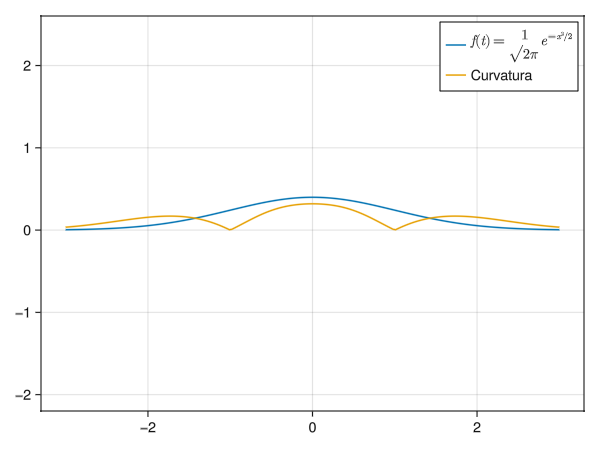

In [21]:
using SymPy, GLMakie
@syms x::real
# Definimos la función.
f(x) = 1/sqrt(2pi) * exp(-x^2/2)
# Dibujamos la gráfica de la función.
fig = Figure()
ax = Axis(fig[1,1], autolimitaspect = 1)
lines!(ax, -3..3, f, label = L"$f(t)= \frac{1}{\sqrt{2\pi}}e^{-x^2/2}$")
fig
# Calculamos la segunda derivada de la función.
df2 = lambdify(diff(f(x), x, 2))
# Calculamos la función de curvatura.
k(x) = abs(df2(x)) / (1 + df2(x)^2)^(3/2)
# Definimos una serie de puntos de la función curvatura.
xs = range(-3, 3, 200)
points = Point2.(xs, k.(xs))
# Dibujamos la función de curvatura
lines!(ax, points, label = "Curvatura")
# Añadimos la leyenda
axislegend()
fig

In [22]:
# Calculamos los puntos que anulan la curvatura.
solve(k(x),x)
# Calculamos los puntos críticos de la curvatura.
# solve(diff(k(x)), x) No encuentra la solución, así que buscamos la solución numéricamente.
using Roots
println("Máximo local en x = $(find_zero(diff(k(x)), -2))")
println("Máximo local en x = $(find_zero(diff(k(x)), 0))")
println("Máximo local en x = $(find_zero(diff(k(x)), 2))")

Máximo local en x = -1.7320508075688772


Máximo local en x = 0.0


Máximo local en x = 1.7320508075688772


In [23]:
using SymPy, LinearAlgebra
"""
    curvatura(h, a)

Calcula la curvatura de la trayectoria de una función vectorial h en el punto a.
"""
function curvatura(f, a)
    @syms t::real
    # Calculamos la primera derivada.
    df(t) = diff.(f(t))
    # Calculamos la segunda derivada.
    df2(t) = diff.(df(t))
    # Calculamos la curvatura
    k(t) = norm(cross(df(t), df2(t))) / norm(df(t))^3
    return N(subs(k(t), t=>a))
end

f(t) = [cos(2t), sin(t), cos(t)]
println("Curvatura en t=0: $(curvatura(f, 0))")
println("Curvatura en t=π/4: $(curvatura(f, pi/4))")
println("Curvatura en t=π/2: $(curvatura(f, pi/2))")
println("Curvatura en t=3π/4: $(curvatura(f, 3pi/4))")

Curvatura en t=0: 4.123105625617661


Curvatura en t=π/4: 0.2
Curvatura en t=π/2: 4.123105625617661
Curvatura en t=3π/4: 0.2


In [24]:
using SymPy, LinearAlgebra
"""
    torsion(h, a)

Calcula la torsion de la trayectoria de una función vectorial h en el punto a.
"""
function torsion(f, a)
    @syms t::real
    # Calculamos la primera derivada.
    df(t) = diff.(f(t))
    # Calculamos la segunda derivada.
    df2(t) = diff.(df(t))
    # Calculamos la tercera derivada.
    df3(t) = diff.(df2(t))
    # Calculamos la torsión.
    τ(t) = dot(cross(df(t), df2(t)), df3(t)) / norm(cross(df(t), df2(t)))^2
    return N(subs(τ(t), t=>a))
end

println("Torsión en t=0: $(torsion(f, 0))")
println("Torsión en t=π/4: $(torsion(f, pi/4))")
println("Torsión en t=π/2: $(torsion(f, pi/2))")
println("Torsión en t=3π/4: $(torsion(f, 3pi/4))")

Torsión en t=0: 0


Torsión en t=π/4: -1.2000000000000002
Torsión en t=π/2: -4.3222828205200695e-17
Torsión en t=3π/4: 1.2000000000000002


In [25]:
using SymPy
"""
    pelota(h, r, θ)

Devuelve un vector con las componentes de la función vectorial que define la posición de una pelota lanzada desde una altura h, con una rapidez r y un ángulo de lanzamiento θ con respecto al horizonte.
"""
function pelota(h, r, θ)
    @syms t::positive
    # Constante con al aceleración de la gravedad
    g = 9.81
    # Posición inicial.
    p₀ = [0, h] 
    # Velocidad inicial.
    v₀ = [r*cos(θ), r*sin(θ)]
    # Aceleración constante
    a(t) = [Sym(0), -g]
    # Obtenemos el vector velocidad integrando la aceleración.
    v(t) = integrate.(a(t), t) + v₀
    # Obtenemos el vector posición integrando el vector velocidad.
    pos = integrate.(v(t), t) + p₀
    return pos
end

pelota

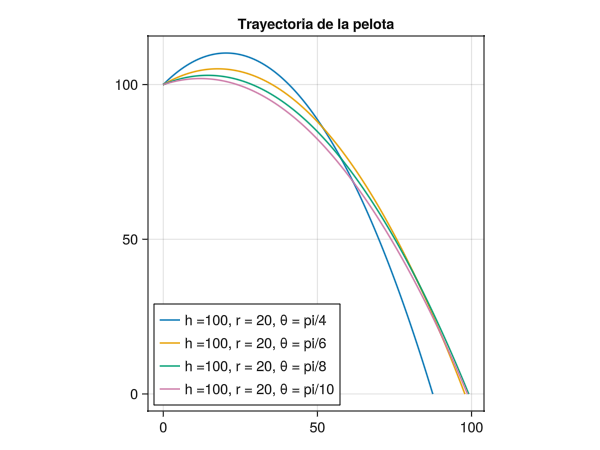

In [26]:
using GLMakie
"""
    trayectoria_pelota(ax, h, r, θ)

Dibuja sobre los ejes ax la gráfica de la trayectoria de una pelota lanzada desde una altura h, con una rapidez r y un ángulo de lanzamiento θ con respecto al horizonte.
"""
function trayectoria_pelota!(ax, h, r, θ)
    @syms t::positive
    # Lambdificamos la función para poder llamarla con parámetros.
    f = lambdify(pelota(h, r, θ))
    # Calculamos el instante en el que la pelota toca el suelo.
    t₀ = N(solve(f(t)[2], t)[1])
    # Definimos un rango de valores desde 0 hasta el instante en que la pelota toca el suelo.
    ts = range(0, t₀, 200)
    # Obtenemos los puntos de la trayectoria.
    points = Point2.(f.(ts))
    # Dibujamos la trayectoria.
    lines!(ax, points, label = "h =$(h), r = $(r), θ = $(θ)")
    return ax
end

fig = Figure()
ax = Axis(fig[1,1], title = "Trayectoria de la pelota", aspect = DataAspect())
trayectoria_pelota!(ax, 100, 20, PI/4)
trayectoria_pelota!(ax, 100, 20, PI/6)
trayectoria_pelota!(ax, 100, 20, PI/8)
trayectoria_pelota!(ax, 100, 20, PI/10)
# Añadimos la leyenda
axislegend(position = :lb)
fig

In [27]:
@syms θ, t:: positive
# Definimos la función vectorial.
g(t) = pelota(0, 20, θ)
# Calculamos el instante en que la pelota toca el suelo.
t₀ = solve(g(t)[2], t)[1]
# Calculamos los puntos críticos de la derivada de la posición horizontal de la pelota.
solve(diff(subs(g(t)[1], t=>t₀), θ))

2-element Vector{Sym{PyCall.PyObject}}:
 -0.785398163397448
  0.785398163397448

In [28]:
using Roots
@syms θ, t:: positive
# Definimos la función vectorial.
g(t) = pelota(100, 20, θ)
# Definimos la función vectorial.
t₀ = solve(g(t)[2], t)[2]
# Calculamos los puntos críticos de la derivada de la posición horizontal de la pelota.
find_zero(diff(subs(g(t)[1], t=>t₀), θ), 0.5)

0.3903970673218906

In [29]:
using LinearAlgebra
@syms t::positive
# Creamos la función vectorial
g(t) = pelota(100, 20, PI/4)
# Añadimos una tercera componente nula para estar en el espacio real.
g3 = push!(g(t), 0)
# Calculamos la primera derivada (vector velocidad).
dg = diff.(g3, t)
# Calculamos la segunda derivada (vector aceleración).
dg2 = diff.(dg, t)
# Calculamos la componente tangencial del vector aceleración.
at = dot(dg, dg2) / norm(dg)

     96.2361⋅t - 98.1⋅√2      
──────────────────────────────
   ___________________________
  ╱                   2       
╲╱  100⋅(0.981⋅t - √2)  + 200 

In [30]:
an = norm(cross(dg, dg2)) / norm(dg)

       138.734350468801       
──────────────────────────────
   ___________________________
  ╱                   2       
╲╱  100⋅(0.981⋅t - √2)  + 200 

In [31]:
solve(at)

1-element Vector{Sym{PyCall.PyObject}}:
 1.44160403911630

In [32]:
# Instante en el que la componente normal de la acelaración es máxima.
solve(diff(an))

1-element Vector{Sym{PyCall.PyObject}}:
 1.44160403911630

In [33]:
solve(diff(g(t)[2]))

1-element Vector{Sym{PyCall.PyObject}}:
 1.44160403911630

In [34]:
#| include: false
using QuizQuestions, SymPy
nothing

In [35]:
#| echo: false
using LinearAlgebra
u = [-pi, sqrt(2), 1]
v = [sqrt(3), -ℯ, -2]
numericq(norm(cross(u,v)), 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(7.603685622425242, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

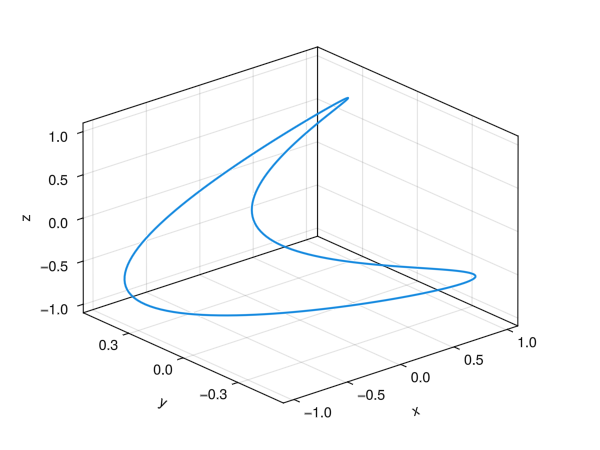

In [36]:
#| echo: false
using GLMakie
myblue = RGBf(0.067,0.529,0.871)
f(t) = [sin(2t), cos(t)/2, sin(t)] 
ts = range(0, 2pi, length = 200)
points = Point3.(f.(ts))
fig = Figure()
ax = Axis3(fig[1,1])
lines!(ax, points, linewidth = 2, color = myblue)
fig

In [37]:
#| echo: false
choices = (L"$f(t)=(\operatorname{sen}(t), \cos(2t), \cos(t)/2)$", L"$f(t)=(\operatorname{sen}(t)/2, \cos(2t), \cos(t))$", L"$f(t)=(\operatorname{sen}(2t), \cos(t)/2, \operatorname{sen}(t))$", L"$f(t)=(\cos(2t), \cos(t)/2, \operatorname{sen}(t/2))$", "Las otras opciones son falsas.")
answer = 3
radioq(choices, answer)

QuizQuestions.Radioq((L"$f(t)=(\cos(2t), \cos(t)/2, \operatorname{sen}(t/2))$", L"$f(t)=(\operatorname{sen}(t)/2, \cos(2t), \cos(t))$", L"$f(t)=(\operatorname{sen}(2t), \cos(t)/2, \operatorname{sen}(t))$", L"$f(t)=(\operatorname{sen}(t), \cos(2t), \cos(t)/2)$", "Las otras opciones son falsas."), 3, [1, 2, 3, 4, 5], (L"$f(t)=(\cos(2t), \cos(t)/2, \operatorname{sen}(t/2))$", L"$f(t)=(\operatorname{sen}(t)/2, \cos(2t), \cos(t))$", L"$f(t)=(\operatorname{sen}(2t), \cos(t)/2, \operatorname{sen}(t))$", L"$f(t)=(\operatorname{sen}(t), \cos(2t), \cos(t)/2)$", "Las otras opciones son falsas."), "", "", "", false)

In [38]:
#| echo: false
using SymPy, LinearAlgebra
@syms t::real
g(t) = [cos(t), t/2, log(t+1)]
a = 1
dg = subs.(diff.(g(t)), t=>a)
tl(t) = g(a) + dg * t
sol = N(norm(tl(1)))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(1.5856553117410055, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [39]:
#| echo: false
using SymPy, LinearAlgebra
@syms x y z t::real
g(t) = [cos(t-1), log(sqrt(t)), t^2]
a = 1
dg = lambdify(diff.(g(t)))
np = solve(dot(([x, y, z] - g(a)), dg(a)), z)[1]
choices = (L"$\frac{1}{4}y-z=1$", L"$2x-z=1$", L"x+y+z=2", L"$x+\frac{1}{2}y-z=0$", "Las otras opciones son falsas.")
answer = 5
radioq(choices, answer)

QuizQuestions.Radioq((L"$x+\frac{1}{2}y-z=0$", L"$2x-z=1$", L"$\frac{1}{4}y-z=1$", L"$x+y+z=2$", "Las otras opciones son falsas."), 5, [1, 2, 3, 4, 5], (L"$x+\frac{1}{2}y-z=0$", L"$2x-z=1$", L"$\frac{1}{4}y-z=1$", L"$x+y+z=2$", "Las otras opciones son falsas."), "", "", "", false)

In [40]:
#| echo: false
using SymPy, LinearAlgebra, QuadGK
@syms t::real
f(t) = [2t^2+t, sin(t)+2cos(t), exp(-t/2)]
sol = N(quadgk(norm(diff.(f(t))), 1, 5)[1])
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(52.512497890264754, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [41]:
#| echo: false
df1 = diff.(f(t))
df2 = diff.(df1)
cur = norm(cross(df1, df2)) / norm(df1)^3
sol = N(subs(cur, t=>2))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(0.010522019463869626, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [42]:
#| echo: false
df3 = diff.(df2)
tor = dot(cross(df1, df2), df3) / norm(cross(df1, df2))^2
sol = N(subs(tor, t=>2))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(-0.05494793911472413, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [43]:
#| echo: false
using SymPy, LinearAlgebra
@syms t
a = pi
f(t) = [400cos(10t), 100sin(10t)] 
vel = diff.(f(t))
sol = norm(subs.(vel, t => a))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(1000, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [44]:
#| echo: false
ace = diff.(vel)
sol = N(norm(subs.(ace, t => a)))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(40000, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [45]:
#| echo: false
at =  diff(sqrt(sum(vel.^2)))
sol = N(at(a))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(0, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [46]:
#| echo: false
f2 = push!(f(t), 0)
df1 = diff.(f2, t)
df2 = diff.(df1)
an = norm(cross(df1, df2)) / norm(df1)
sol = N(subs.(an, t => a))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(40000, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)

In [47]:
#| echo: false
sol = N(atand(subs.(an, t => a) / (9.8*3600)))
numericq(sol, 1e-5, hint="Introducir hasta 5 decimales")

QuizQuestions.Numericq(48.58770634564123, 1.0e-5, "", "", "Introducir hasta 5 decimales", "", nothing)